In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys() #可以将digits理解成字典，注意digits是sklearn自己设置的数据结构

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
X = digits.data
X.shape #一共有1797个样本，每个样本64个特征（像素点）

(1797, 64)

In [6]:
y = digits.target
y.shape #一共有1797个样本

(1797,)

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [9]:
certain_digit = X[921]

In [10]:
y[921]

6

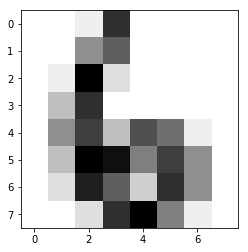

In [11]:
certain_digit_image = certain_digit.reshape(8,8)
plt.imshow(certain_digit_image, cmap = matplotlib.cm.binary)
plt.show()

### 用knn预测数字是多少

In [17]:
import sys
sys.path.append("..")
from myML.model_selection import my_train_test_split

In [18]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_ratio = 0.2)

In [30]:
import sys
sys.path.append("..")
from myML.kNN_classifier import myKNNClassifier

In [31]:
my_knn_clf = myKNNClassifier(k=3)

In [32]:
my_knn_clf.fit(X_train, y_train)

Bessie: from __repr__: KNN(k = 3)

In [33]:
y_predict = my_knn_clf.predict(X_test)

In [34]:
np.sum(y_predict == y_test) / len(y_test)

0.9888888888888889

### 将计算accuracy封装

In [35]:
from myML.matrics import accuracy_score

In [36]:
accuracy_score(y_test, y_predict)

0.9888888888888889

### 将封装函数accuracy_score()嵌入myKNNClassifier类中, 命名为score()

In [37]:
my_knn_clf.score(X_test, y_test)

0.9888888888888889

### scikit-learn中的accuracy_score()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666) #注意ratio叫做test_size，不是test_ratio

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9888888888888889

In [29]:
knn_clf.score(X_test, y_test)

0.9888888888888889